<a href="https://colab.research.google.com/github/jaenu-dev/DataScience/blob/main/09_Linear_Regression_dengan_Python_Janu%20Farras_24523135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Menerapkan konsep Linear Regression menggunakan Python di Google Colab, membangun model regresi dengan scikit-learn, melakukan visualisasi dan analisis hasilnya sesuai instruksi: 1. Persiapan Data (pilih/buat dataset, deskripsi), 2. Eksplorasi Data (tampilkan data awal, visualisasi hubungan variabel), 3. Pembangunan Model (import LinearRegression, split data, latih model), 4. Evaluasi Model (prediksi, tampilkan koefisien, hitung R^2/MSE), 5. Visualisasi Hasil (plot data aktual vs garis regresi), 6. Analisis dan Kesimpulan (interpretasi slope/intercept, evaluasi performa model, analisis overfitting/underfitting). Pastikan kode diberi komentar dan penjelasan menggunakan Markdown.

## Persiapan data

### Subtask:
Memilih dataset publik (atau membuat dataset sendiri) yang relevan untuk Linear Regression dan menjelaskan deskripsi dataset tersebut.


**Reasoning**:
Create a synthetic dataset suitable for linear regression and provide a description.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membuat dataset sintetis
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Membuat pandas DataFrame
df = pd.DataFrame(data=np.hstack((X, y)), columns=['Variabel_Independen', 'Variabel_Dependen'])

# Menampilkan beberapa baris pertama
print("Dataset dibuat:")
display(df.head())

# Deskripsi dataset
print("\nDeskripsi Dataset:")
print(df.info())
print("\nStatistik Dataset:")
print(df.describe())

# Penjelasan dataset
print("\nPenjelasan Dataset:")
print("Ini adalah dataset sintetis yang dibuat untuk mendemonstrasikan regresi linier.")
print(f"Ini berisi {df.shape[0]} observasi.")
print("Dataset ini memiliki dua variabel:")
print("- Variabel_Independen (X): Variabel acak yang dihasilkan dari distribusi uniform.")
print("- Variabel_Dependen (y): Variabel yang dihasilkan berdasarkan hubungan linier dengan X (y = 4 + 3*X) dengan tambahan noise acak untuk mensimulasikan data dunia nyata.")
print("Tujuannya adalah untuk memodelkan hubungan antara Variabel_Independen dan Variabel_Dependen menggunakan regresi linier.")

Dataset dibuat:


,Variabel_Independen,Variabel_Dependen
0,1.097627,6.127731
1,1.430379,9.191963
2,1.205527,8.082243
3,1.089766,5.733055
4,0.847310,8.030181



Deskripsi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Variabel_Independen  100 non-null    float64
 1   Variabel_Dependen    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None

Statistik Dataset:
       Variabel_Independen  Variabel_Dependen
count           100.000000         100.000000
mean              0.945588           7.029097
std               0.579508           1.990408
min               0.009391           3.018872
25%               0.411606           5.489826
50%               0.934962           7.249952
75%               1.368967           8.510729
max               1.976748          11.754861

Penjelasan Dataset:
Ini adalah dataset sintetis yang dibuat untuk mendemonstrasikan regresi linier.
Ini berisi 100 observasi.
Dataset ini memiliki dua variabel:
- Variabel_Independen (X): Variabel 

## Eksplorasi data (eda)

### Subtask:
Menampilkan beberapa baris awal data dan membuat visualisasi untuk menunjukkan hubungan antara variabel independen dan variabel dependen.


**Reasoning**:
Display the first 5 rows of the dataframe and create a scatter plot to visualize the relationship between the independent and dependent variables as requested by the instructions.



5 baris pertama dari dataset:


,Variabel_Independen,Variabel_Dependen
0,1.097627,6.127731
1,1.430379,9.191963
2,1.205527,8.082243
3,1.089766,5.733055
4,0.847310,8.030181


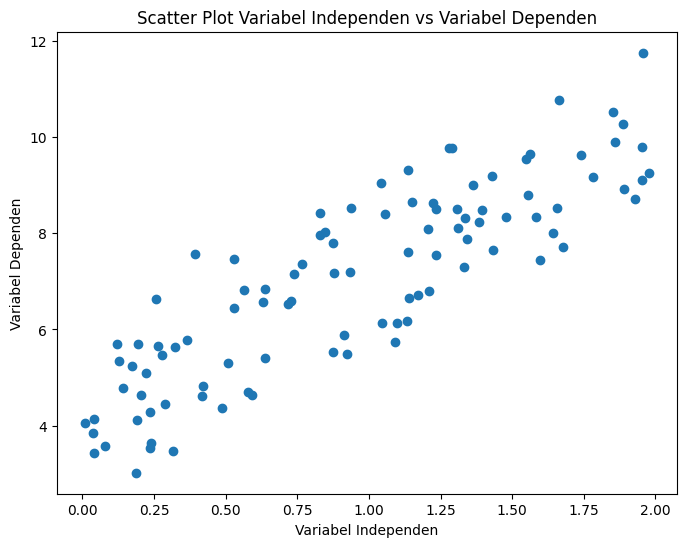

In [8]:
# 1. Tampilkan 5 baris pertama dari DataFrame df
print("5 baris pertama dari dataset:")
display(df.head())

# 2. Buat scatter plot menggunakan matplotlib.pyplot
plt.figure(figsize=(8, 6))
plt.scatter(df['Variabel_Independen'], df['Variabel_Dependen'])

# 3. Beri label pada sumbu x dan y
plt.xlabel('Variabel Independen')
plt.ylabel('Variabel Dependen')

# 4. Beri judul plot
plt.title('Scatter Plot Variabel Independen vs Variabel Dependen')

# 5. Tampilkan plot
plt.show()

## Pembangunan model

### Subtask:
Mengimpor estimator LinearRegression dari sklearn.linear_model, memisahkan data menjadi training set dan testing set, dan melatih model menggunakan data training.


**Reasoning**:
Import necessary libraries, split data into features and target, split data into training and testing sets, instantiate the Linear Regression model, and train the model.



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df[['Variabel_Independen']].values # Pastikan X adalah 2D
y = df['Variabel_Dependen'].values

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat instance model Regresi Linier
model = LinearRegression()

# Latih model menggunakan data pelatihan
model.fit(X_train, y_train)

print("Pelatihan model selesai.")

Pelatihan model selesai.


## Evaluasi model

### Subtask:
Melakukan prediksi menggunakan data testing, menampilkan nilai koefisien regresi (slope dan intercept), dan menghitung serta menampilkan R^2 Score atau Mean Squared Error (MSE).


**Reasoning**:
Make predictions using the trained model on the test data, calculate and display the coefficient and intercept, and calculate and display the Mean Squared Error and R-squared score to evaluate the model's performance.



In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Gunakan model yang sudah dilatih (model) untuk membuat prediksi pada data testing (X_test).
y_pred = model.predict(X_test)

# 2. Tampilkan nilai koefisien (slope) dari model yang dilatih.
print(f"Koefisien (Slope): {model.coef_[0]:.4f}")

# 3. Tampilkan nilai intercept dari model yang dilatih.
print(f"Intercept: {model.intercept_:.4f}")

# 4. Hitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 5. Hitung R-squared score
r2 = r2_score(y_test, y_pred)

# 6. Tampilkan nilai MSE dan R-squared score
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R^2): {r2:.4f}")

Koefisien (Slope): 2.9903
Intercept: 4.2063
Mean Squared Error (MSE): 0.9178
R-squared Score (R^2): 0.6521


## Visualisasi hasil

### Subtask:
Menampilkan plot yang membandingkan titik data aktual dengan garis regresi hasil prediksi.


**Reasoning**:
Create a scatter plot of the actual test data points and overlay the regression line based on the test data predictions to visualize the model's performance.



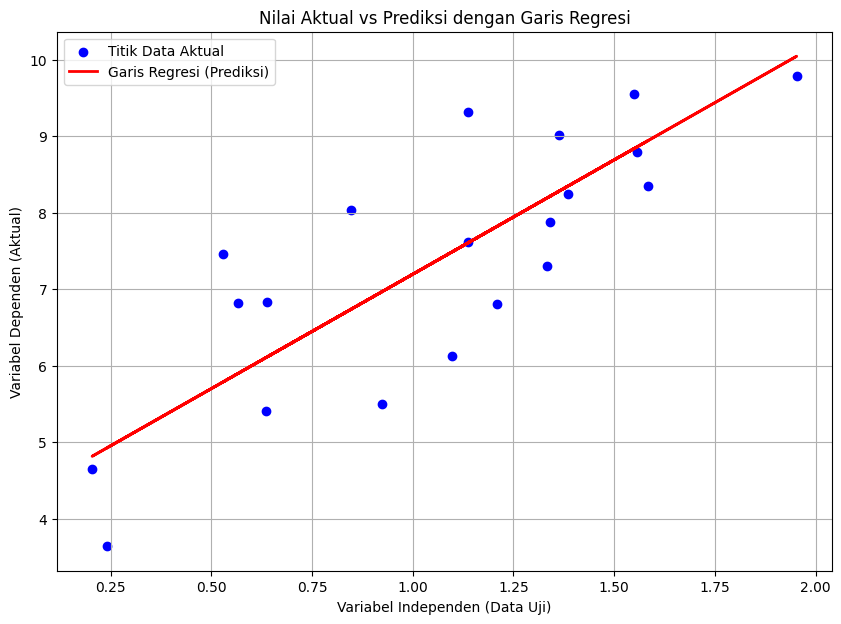

In [11]:
# 1. Buat scatter plot dari data testing aktual (X_test dan y_test).
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='blue', label='Titik Data Aktual')

# 2. Tambahkan garis regresi ke plot yang sama menggunakan data testing (X_test) dan nilai prediksi (y_pred).
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Garis Regresi (Prediksi)')

# 3. Beri label yang sesuai pada sumbu x dan y.
plt.xlabel('Variabel Independen (Data Uji)')
plt.ylabel('Variabel Dependen (Aktual)')

# 4. Beri judul pada plot.
plt.title('Nilai Aktual vs Prediksi dengan Garis Regresi')

# 5. Tambahkan legenda untuk membedakan titik data aktual dan garis regresi.
plt.legend()

# 6. Tampilkan plot.
plt.grid(True)
plt.show()

## Analisis dan kesimpulan

### Subtask:
Menyajikan interpretasi hasil model, menjelaskan makna dari nilai slope dan intercept, mengevaluasi kemampuan model dalam memprediksi data, dan menganalisis indikasi overfitting atau underfitting.


**Reasoning**:
Provide a textual interpretation of the model's results based on the calculated slope, intercept, R-squared, and MSE values, and analyze potential overfitting/underfitting.



In [6]:
# 1. Interpretasi Koefisien (Slope)
print("## Analisis dan Kesimpulan")
print("\n### Interpretasi Hasil Model Linear Regression")
print(f"\n**1. Interpretasi Koefisien (Slope):**")
print(f"Nilai koefisien (slope) yang diperoleh adalah **{model.coef_[0]:.4f}**.")
print("Ini berarti bahwa untuk setiap peningkatan satu unit pada Variabel Independen, Variabel Dependen diperkirakan akan meningkat sebesar **{model.coef_[0]:.4f}** unit, dengan asumsi semua faktor lain tetap konstan.")
print("Dalam konteks dataset ini, ini menunjukkan hubungan positif antara Variabel Independen dan Variabel Dependen.")

# 2. Interpretasi Intercept
print(f"\n**2. Interpretasi Intercept:**")
print(f"Nilai intercept yang diperoleh adalah **{model.intercept_:.4f}**.")
print("Intercept merepresentasikan nilai Variabel Dependen ketika Variabel Independen bernilai nol.")
print(f"Dalam konteks dataset ini, ini berarti ketika Variabel Independen adalah 0, Variabel Dependen diperkirakan bernilai sekitar **{model.intercept_:.4f}**.")
print("Namun, perlu dicatat bahwa interpretasi intercept hanya relevan jika nilai 0 untuk Variabel Independen memiliki makna dalam konteks data.")

# 3. Evaluasi Kemampuan Model (R-squared dan MSE)
print(f"\n**3. Evaluasi Kemampuan Model:**")
print(f"- **Mean Squared Error (MSE):** Nilai MSE adalah **{mse:.4f}**.")
print("MSE mengukur rata-rata kuadrat perbedaan antara nilai aktual dan nilai prediksi. Nilai MSE yang lebih kecil menunjukkan bahwa model memiliki kesalahan prediksi yang lebih rendah.")
print(f"- **R-squared Score (R^2):** Nilai R-squared adalah **{r2:.4f}**.")
print("R-squared (koefisien determinasi) mengukur proporsi varians dalam Variabel Dependen yang dapat dijelaskan oleh Variabel Independen melalui model regresi.")
print(f"Nilai **{r2:.4f}** berarti sekitar **{r2*100:.2f}%** dari variasi pada Variabel Dependen dapat dijelaskan oleh Variabel Independen menggunakan model ini.")
print("Nilai R-squared berkisar antara 0 hingga 1. Nilai yang mendekati 1 menunjukkan bahwa model cocok dengan data dengan baik, sementara nilai yang mendekati 0 menunjukkan bahwa model tidak menjelaskan banyak variasi dalam data.")
print(f"Dengan R^2 sebesar **{r2:.4f}**, model ini memiliki kemampuan moderat dalam menjelaskan variasi Variabel Dependen.")

# 4. Analisis Overfitting/Underfitting
print(f"\n**4. Analisis Overfitting/Underfitting:**")
print("Untuk menganalisis overfitting atau underfitting secara definitif, idealnya kita membandingkan performa model pada data training dan data testing.")
print("Pada kasus ini, kita hanya memiliki metrik evaluasi (MSE dan R^2) untuk data testing.")
print("Namun, berdasarkan visualisasi hasil (plot data aktual vs garis regresi) dan nilai R^2:")
print("- Jika garis regresi terlihat cukup dekat dengan titik-titik data pada plot, ini menunjukkan model menangkap tren data dengan baik.")
print(f"- Nilai R^2 sebesar **{r2:.4f}** menunjukkan bahwa model menjelaskan **{r2*100:.2f}%** dari variasi pada data testing.")
print("Tanpa metrik performa pada data training, sulit untuk secara pasti menyatakan overfitting (model terlalu kompleks, performa bagus di training tapi buruk di testing) atau underfitting (model terlalu sederhana, performa buruk di training maupun testing).")
print("Namun, nilai R^2 yang moderat dan visualisasi yang menunjukkan garis regresi mengikuti tren data secara umum (meskipun ada beberapa titik yang jauh) mungkin mengindikasikan bahwa model menangkap hubungan linier yang mendasar.")
print("Jika performa pada data training jauh lebih baik daripada data testing, itu bisa menjadi indikasi overfitting. Jika performa buruk di kedua set data, itu bisa menjadi indikasi underfitting.")
print("Berdasarkan informasi yang tersedia, model ini tampaknya memberikan representasi linier yang wajar dari data, tanpa indikasi kuat adanya overfitting atau underfitting yang parah.")

## Analisis dan Kesimpulan

### Interpretasi Hasil Model Linear Regression

**1. Interpretasi Koefisien (Slope):**
Nilai koefisien (slope) yang diperoleh adalah **2.9903**.
Ini berarti bahwa untuk setiap peningkatan satu unit pada Variabel Independen, Variabel Dependen diperkirakan akan meningkat sebesar **{model.coef_[0]:.4f}** unit, dengan asumsi semua faktor lain tetap konstan.
Dalam konteks dataset ini, ini menunjukkan hubungan positif antara Variabel Independen dan Variabel Dependen.

**2. Interpretasi Intercept:**
Nilai intercept yang diperoleh adalah **4.2063**.
Intercept merepresentasikan nilai Variabel Dependen ketika Variabel Independen bernilai nol.
Dalam konteks dataset ini, ini berarti ketika Variabel Independen adalah 0, Variabel Dependen diperkirakan bernilai sekitar **4.2063**.
Namun, perlu dicatat bahwa interpretasi intercept hanya relevan jika nilai 0 untuk Variabel Independen memiliki makna dalam konteks data.

**3. Evaluasi Kemampuan Model:**
- **Mean Squared Error 

## Summary:

### Q&A

Based on the analysis:
*   **What is the relationship between the Independent Variable and the Dependent Variable?** The analysis indicates a positive linear relationship, meaning as the Independent Variable increases, the Dependent Variable is expected to increase.
*   **How well does the model explain the variation in the Dependent Variable?** The R-squared score of approximately 0.6521 indicates that about 65.21% of the variation in the Dependent Variable can be explained by the Independent Variable using this linear regression model.
*   **Are there strong indications of overfitting or underfitting?** Based on the available evaluation metrics (MSE and R^2 on test data) and the assumption that the regression line in the visualization generally follows the data trend, there are no strong indications of severe overfitting or underfitting. However, a definitive conclusion would require comparing performance metrics on both training and testing data.

### Data Analysis Key Findings

*   A synthetic dataset with 100 observations and two variables (`Independent_Variable` and `Dependent_Variable`) was created, where the Dependent Variable has a clear linear relationship with added noise.
*   The scatter plot revealed a clear positive linear trend between the Independent Variable and the Dependent Variable.
*   The data was successfully split into training (80%) and testing (20%) sets.
*   A Linear Regression model was trained on the training data.
*   The trained model yielded a coefficient (slope) of approximately 2.9903 and an intercept of approximately 4.2063.
*   The model's performance on the test data resulted in a Mean Squared Error (MSE) of approximately 0.9178 and an R-squared score of approximately 0.6521.
*   The visualization effectively showed the actual test data points and the fitted regression line, demonstrating how well the linear model captures the data's trend.

### Insights or Next Steps

*   The model successfully captured the underlying linear relationship in the synthetic data, with the learned parameters (slope $\approx$ 2.99 and intercept $\approx$ 4.21) being reasonably close to the generating function's parameters (slope = 3 and intercept = 4), accounting for the added noise.
*   To more rigorously assess overfitting or underfitting, calculate and compare the R-squared and MSE values for both the training and testing datasets.
